In [60]:


import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, ELU
import numpy as np

from matplotlib import pyplot


import sys



In [61]:
py_ver = sys.version;
tf_ver = tf.version.VERSION;
np_ver = np.version.version;

required_py_ver = "3.9.5";
required_tf_ver = "2.5.0";
required_np_ver = "1.19.5";

print(f'Using python version: {py_ver}');
print(f'Using TensorFlow version: {tf_ver}');
print(f'Using numpy version: {np_ver}');

if not(py_ver[:5] == required_py_ver and tf_ver == required_tf_ver and np_ver == required_np_ver ):
    raise Exception(f"\nIncorrect versions!\n\nShould be:\nPython: {required_py_ver}\nTensorFlow: {required_tf_ver}\nNumpy: {required_np_ver} ");
  


Using python version: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
Using TensorFlow version: 2.5.0
Using numpy version: 1.19.5


In [62]:
# load in the data 

full_dataset = np.load("ml_dataset.npy");

In [63]:
# split up the data into the x and y halves

x_set = full_dataset[0];
y_set = full_dataset[1];

In [64]:
# split the data into training and testing sets


half = int(len(x_set)/2);

print(f'half: {half}');
'''
x_train = x_set[0:half];
x_test = x_set[half:];

y_train = y_set[0:half];
y_test = y_set[half:];
'''


x_train = x_set[::2];
x_test = x_set[1::2];

y_train = y_set[::2];
y_test = y_set[1::2];


half: 151


In [65]:
# print some data diagnostics to ensure we correctly obtained data sets

print(f"x_set shape: {x_set.shape}");
print(f"y_set shape: {y_set.shape}");


training_point_number = x_set.shape[1];
print(f"number of points in each graph set: {training_point_number}");


print("number of x training data sets:");
print(len(x_train[0:]));


print("number of y training data sets:");
print(len(y_train[0:]));

assert(len(x_train) == len(y_train));
assert(len(x_test) == len(y_test));
assert(x_set.shape == y_set.shape);

print(f"\nNumber of training graph-solution sets: {len(x_train)}")


print(f"Number of testing graph-solution sets: {len(x_test)}")



print(f"\nDataset shape: {x_set.shape}")



x_set shape: (302, 500)
y_set shape: (302, 500)
number of points in each graph set: 500
number of x training data sets:
151
number of y training data sets:
151

Number of training graph-solution sets: 151
Number of testing graph-solution sets: 151

Dataset shape: (302, 500)


In [66]:
# reshape the x data into a column of 1 element rows for the LSTM


x_train = x_train.reshape(x_train.shape[0],training_point_number,1);
x_test = x_test.reshape(x_test.shape[0],training_point_number,1);

print(x_train.shape)

(151, 500, 1)


In [67]:
#build the model by stacking layers


model = tf.keras.models.Sequential()

model.add(LSTM(training_point_number));


model.add(Dense(training_point_number,activation='tanh'));

model.add(Dense(training_point_number,activation='exponential'));


print("model built");


model built


In [68]:
#print(y_train[0])

In [69]:
# get the predictions for the second datapoint
predictions = model(x_train)

# print the raw predictions for that datapoint. Note that these are "logits" or "log-odds" scores, which is related to the probability, 
# and also is the inverse of the sigmoid function
print("logits prediction: ");
print(predictions[0]);

# we can use the softmax function to convert these logits to probabilities for each preciction class
#print("odds prediction: ");
#print(tf.nn.softmax(predictions).numpy()[0]);


print(f'shape: {predictions.shape}');


logits prediction: 
tf.Tensor(
[1.0000011  0.9999969  0.9999972  1.0000043  0.9999999  0.99999934
 1.000006   0.999994   1.0000072  1.000005   1.0000046  1.000011
 0.9999965  0.9999902  1.0000095  1.0000045  1.0000019  1.0000054
 0.9999923  0.9999989  1.000009   0.9999923  0.9999934  0.99999785
 0.999996   1.0000126  1.0000019  1.000007   1.0000093  0.99999595
 0.9999974  1.0000018  0.9999957  0.9999974  0.99999523 1.000002
 0.99999523 1.0000039  1.0000046  0.99999714 1.0000033  1.0000044
 1.0000017  1.0000008  0.99999774 0.999994   0.9999993  0.9999982
 1.0000001  0.99999493 0.9999921  0.99999785 0.99999815 0.9999988
 0.99999726 1.000007   0.99999076 0.9999958  1.0000031  0.99999255
 1.0000025  1.0000027  0.99999434 1.0000044  0.9999942  0.99999225
 0.9999932  0.9999953  1.0000086  0.999997   1.0000043  1.0000085
 1.000001   0.99999505 1.000006   1.0000014  0.9999901  0.9999921
 0.99999744 0.9999978  1.0000049  0.99999493 1.0000039  1.0000025
 1.0000014  1.0000025  1.0000038  0.999996

In [70]:
# get the loss function as a MeanSquaredError loss from tf.keras.losses. 
loss_fn = tf.keras.losses.MeanSquaredError();

print("loss:");
print(loss_fn(y_train[0],predictions[0]).numpy());

loss:
66959124.0


In [71]:
opt = tf.keras.optimizers.Adam(learning_rate=1.5e-4);

model.compile(loss=loss_fn,optimizer=opt,metrics=['accuracy']);


In [72]:
model.fit(x_train,y_train,epochs=15,validation_data=(x_test,y_test), batch_size=10);

Epoch 1/15
16/16 [==============================] - 59s 4s/step - loss: 3562491.7500 - accuracy: 0.0000e+00 - val_loss: 3329679.0000 - val_accuracy: 0.0000e+00
Epoch 2/15
16/16 [==============================] - 57s 4s/step - loss: 3549101.2500 - accuracy: 0.0000e+00 - val_loss: 3293656.5000 - val_accuracy: 0.0000e+00
Epoch 3/15
16/16 [==============================] - 50s 3s/step - loss: 3466415.5000 - accuracy: 0.0000e+00 - val_loss: 3145904.0000 - val_accuracy: 0.0000e+00
Epoch 4/15
16/16 [==============================] - 49s 3s/step - loss: 3186267.7500 - accuracy: 0.0000e+00 - val_loss: 2798929.7500 - val_accuracy: 0.0000e+00
Epoch 5/15
16/16 [==============================] - 48s 3s/step - loss: 2815836.5000 - accuracy: 0.0000e+00 - val_loss: 2439371.2500 - val_accuracy: 1.0000
Epoch 6/15
16/16 [==============================] - 48s 3s/step - loss: 2602492.5000 - accuracy: 0.4636 - val_loss: 2397766.2500 - val_accuracy: 0.0000e+00
Epoch 7/15
16/16 [==============================

In [73]:

print(model.summary());

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 500)               1004000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
Total params: 1,505,000
Trainable params: 1,505,000
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
predictions = model(x_test);

(151, 500)
(500,)


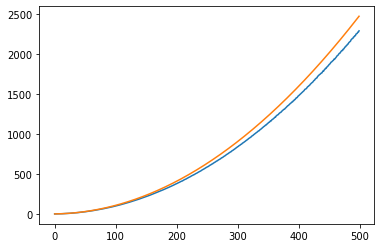

In [92]:
graphnum = 35;

first_graph = predictions[graphnum];
print(predictions.shape);

x = np.linspace(0,500,500);
print(x.shape)

pyplot.plot(first_graph);
pyplot.plot(y_test[graphnum])

In [76]:
print(first_graph)

tf.Tensor(
[2.28184566e-01 3.30034286e-01 4.47497636e-01 5.84704340e-01
 7.39759624e-01 9.11515772e-01 1.10197830e+00 1.31217301e+00
 1.53674567e+00 1.78321278e+00 2.04566455e+00 2.32380891e+00
 2.62514281e+00 2.94288087e+00 3.27813363e+00 3.62801075e+00
 4.00795269e+00 4.39528608e+00 4.80108738e+00 5.22829390e+00
 5.67027569e+00 6.14165831e+00 6.60417223e+00 7.10602140e+00
 7.62839556e+00 8.15686989e+00 8.71868706e+00 9.29302597e+00
 9.87372684e+00 1.04693336e+01 1.10879345e+01 1.17532482e+01
 1.24151688e+01 1.30878601e+01 1.37794914e+01 1.45083017e+01
 1.52319708e+01 1.59972610e+01 1.67358685e+01 1.75227470e+01
 1.83528709e+01 1.91933498e+01 2.00372238e+01 2.09089966e+01
 2.17640705e+01 2.26634827e+01 2.35408554e+01 2.44942093e+01
 2.54717026e+01 2.64179840e+01 2.73875332e+01 2.84053535e+01
 2.94629173e+01 3.05073318e+01 3.15723419e+01 3.26045609e+01
 3.37358360e+01 3.48675423e+01 3.59268723e+01 3.71437569e+01
 3.82154160e+01 3.95024986e+01 4.06256371e+01 4.18302155e+01
 4.31295891e+